### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import missingno as msno

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor

import category_encoders as ce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Чтение данных

In [2]:
df = pd.read_csv('aps_failure_training_set.csv')
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003 ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000 aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000 as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002 az_003   az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  ba_003  ba_004  ba_005   ba_006  ba_007 ba_008 ba_009   bb_000 bc_000 bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000   bv_000   bx_000   by_000  bz_000  ca_000  cb_000   cc_000   cd_000  ce_000 cf_000 cg_000 ch_000      ci_000 cj_000     ck_000 cl_000 cm_000 cn_000 cn_001 cn_002  cn_003   cn_004   cn_005   cn_006 cn_007 cn_008 cn_009 co_000 cp_000   cq_000 cr_000 cs_000 cs_001  cs_002  cs_003  cs_004   cs_005   cs_006 cs_007 cs_008 cs_009 ct_000 cu_000   cv_000  \
0   neg   76698     na  2130706438    280      0      0      0      0      0      0  37250  1432864  3664156  1007684  25896      0  2551696      0      0      0      0     0  4933296  3655166  1766008  1132040      0      0      0      0   1012    268      0      0      0      0      0  469014  4239660   703300   755876      0   5374   2108   4114  12348   615248  5526276   2378      4      0      0  2328746  1022304  415432  287230  310246  681504  1118814    3574      0      0  6700214      0     10    108     50  2551696  97518  947550  799478  330760  353400  299160  305200  283680     na     na     na  178540  76698.08  6700214  6700214  6599892    43566   68656   54064  638360  6167850  1209600  246244      2     96      0     5245752      0  916567.68      6   1924      0      0      0  118196  1309472  3247182  1381362  98822  11208   1608    220    240  6700214     na  10476   1226  267998  521832  428776  4015854   895240  26330    118      0    532    734  4122704   
1   neg   33058     na           0     na      0      0      0      0      0      0  18254   653294  1720800   516724  31642      0  1393352      0     68      0      0     0  2560898  2127150  1084598   338544      0      0      0      0      0      0      0      0      0      0      0   71510   772720  1996924    99560      0   7336   7808  13776  13086  1010074  1873902  14726      6      0      0  1378576   447166  199512  154298  137280  138668   165908  229652  87082   4708  3646660     86    454    364    350  1393352  49028  688314  392208  341420  359780  366560      na      na     na     na     na    6700  33057.51  3646660  3646660  3582034  17733.0  260120  115626    6900  2942850  1209600       0     na     na     na  2291079.36      0  643536.96      0      0      0      0     38   98644  1179502  1286736   336388  36294   5192     56     na      0  3646660     na   6160    796  164860  350066  272956  1837600   301242   9148     22      0     na     na       na   
2   neg   41040     na         228    100      0      0      0      0      0      0   1648   370592  1883374   292936  12016      0  1234132      0      0      0      0     0  2371990  2173634   300796   153698      0      0      0      0    358    110      0      0      0      0      0       0   870456   239798  1450312      0   1620   1156   1228  34250  1811606   710672     34      0      0      0   790690   672026  332340  254892  189596  135758   103552   81666     46      0  2673338    128    202    576      4  1234132  28804  160176  139730  137160  130640      na      na      na     na     na     na   28000  41040.08  2673338  2673338  2678534  15439.0    7466   22436  248240  2560566  1209600   63328      0    124      0  2322692.16      0  236099.52      0      0      0      0      0   33276  1215280  1102798   196502  10260   2422     28      0      6  2673338     na   3584    500   56362  149726  100326  1744838   488302  16682    246      0    230    292  2180528   
3   neg      12      0    

limit_output extension: Maximum message size of 10000 exceeded with 21066 characters

In [3]:
df.shape

(60000, 171)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
df.describe(include=["O"])

class ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003 ag_004 ag_005 ag_006 ag_007 ag_008 ag_009 ah_000 ai_000 aj_000 ak_000 al_000   am_0 an_000 ao_000 ap_000 aq_000 ar_000 as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004 ay_005 ay_006 ay_007 ay_008 ay_009 az_000 az_001 az_002 az_003 az_004 az_005 az_006 az_007 az_008 az_009 ba_000 ba_001 ba_002 ba_003 ba_004 ba_005 ba_006 ba_007 ba_008 ba_009 bb_000 bc_000 bd_000 be_000 bf_000 bg_000 bh_000 bi_000 bj_000 bk_000 bl_000 bm_000 bn_000 bo_000 bp_000 bq_000 br_000 bs_000 bt_000 bu_000 bv_000 bx_000 by_000 bz_000 ca_000 cb_000 cc_000   cd_000 ce_000 cf_000 cg_000 ch_000 ci_000 cj_000 ck_000 cl_000 cm_000 cn_000 cn_001 cn_002 cn_003 cn_004 cn_005 cn_006 cn_007 cn_008 cn_009 co_000 cp_000 cq_000 cr_000 cs_000 cs_001 cs_002 cs_003 cs_004 cs_005 cs_006 cs_007 cs_008 cs_009 ct_000 cu_000 cv_000 cx_000 cy_000 cz_000 da_000 db_000 dc_000 dd_000 de_000 df_000 dg_000 dh_000 di_000 dj_000 dk_000 dl_000  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000    60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique      2     30   2062   1887    334    419    155    618   2423   7880  23072  40798  40616  32126  18933   5356  43572   4056    895    160   9018  10583  48205  47724  44673  34922     69     22   3512     57   3861   2216    467    920    987   1033   1768  19697  34629  38652  37823    448   9185   7379   9065  21531  34078  44602  12307   3877   1272    337  44841  40165  35959  32915  30674  29594  29282  25167  11817   6798  49393   2808   3566   3919   1099  43569  25241  42099  38360  12918  11970   9038   7097   5839   4969   4277   3807  12835  45481  49350  49347  52849  22628  16548  28319  30171  43860        2  22076    526    647      3  45965   7618  45044    973   2124   1531   5420  14790  34111  42087  38555  32427  21997  10118   3056   1861   2316  49348     75   9298   3344  28278  35194  34559  42559  40917  17301    774     54   2618   3520  32929  25237    749  10728    264    147  33178   6564   1894    403   1314   1056   5619     73    257    182   
top       neg     na      0     na      0      0      0      0      0      0      0      0      0      0      0      0     na      0      0      0      0      0     na     na     na     na      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     na      0      0      0      0     na     na     na     na     na     na     na     na     na     na     na     na     na     na     na     na     na      0      0     na     na     na  1209600      0      0     na      0     na      0     na      0      0      0      0      0      0      0      0      0      0      0      0     na      0     na     na      0      0      0      0      0      0      0      0      0      0     na     na     na     na      0     na      0      0     na     na     na      0      0      0      0      0      0      0   
freq    5900

limit_output extension: Maximum message size of 10000 exceeded with 17709 characters

### почти все столбцы признаков содержат тестовое значения "na", заменю его на 0 и преобразую признаки в тип int

In [6]:
columns_numbers = df.drop(columns = ['class']).columns

In [7]:
df[columns_numbers] = df[columns_numbers].replace('na',0).astype(float)

In [8]:
df.head()

class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  ag_003   ag_004     ag_005     ag_006     ag_007   ag_008  ag_009     ah_000  ai_000  aj_000  ak_000  al_000    am_0     an_000     ao_000     ap_000     aq_000  ar_000  as_000  at_000  au_000  av_000  ax_000  ay_000  ay_001  ay_002  ay_003   ay_004    ay_005     ay_006     ay_007     ay_008  ay_009  az_000  az_001   az_002   az_003     az_004     az_005   az_006  az_007  az_008  az_009     ba_000     ba_001    ba_002    ba_003    ba_004    ba_005     ba_006    ba_007   ba_008  ba_009     bb_000  bc_000  bd_000  be_000  bf_000     bg_000   bh_000    bi_000    bj_000    bk_000    bl_000    bm_000    bn_000    bo_000  bp_000  bq_000  br_000    bs_000    bt_000     bu_000     bv_000     bx_000   by_000    bz_000    ca_000    cb_000     cc_000     cd_000    ce_000  cf_000  cg_000  ch_000      ci_000  cj_000     ck_000  cl_000  cm_000  cn_000  cn_001  cn_002    cn_003     cn_004     cn_005     cn_006  \
0   neg  76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0     0.0  37250.0  1432864.0  3664156.0  1007684.0  25896.0     0.0  2551696.0     0.0     0.0     0.0     0.0     0.0  4933296.0  3655166.0  1766008.0  1132040.0     0.0     0.0     0.0     0.0  1012.0   268.0     0.0     0.0     0.0     0.0      0.0  469014.0  4239660.0   703300.0   755876.0     0.0  5374.0  2108.0   4114.0  12348.0   615248.0  5526276.0   2378.0     4.0     0.0     0.0  2328746.0  1022304.0  415432.0  287230.0  310246.0  681504.0  1118814.0    3574.0      0.0     0.0  6700214.0     0.0    10.0   108.0    50.0  2551696.0  97518.0  947550.0  799478.0  330760.0  353400.0  299160.0  305200.0  283680.0     0.0     0.0     0.0  178540.0  76698.08  6700214.0  6700214.0  6599892.0  43566.0   68656.0   54064.0  638360.0  6167850.0  1209600.0  246244.0     2.0    96.0     0.0  5245752.00     0.0  916567.68     6.0  1924.0     0.0     0.0     0.0  118196.0  1309472.0  3247182.0  1381362.0   
1   neg  33058.0     0.0  0.000000e+00     0.0     0.0     0.0     0.0     0.0     0.0     0.0  18254.0   653294.0  1720800.0   516724.0  31642.0     0.0  1393352.0     0.0    68.0     0.0     0.0     0.0  2560898.0  2127150.0  1084598.0   338544.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0   71510.0   772720.0  1996924.0    99560.0     0.0  7336.0  7808.0  13776.0  13086.0  1010074.0  1873902.0  14726.0     6.0     0.0     0.0  1378576.0   447166.0  199512.0  154298.0  137280.0  138668.0   165908.0  229652.0  87082.0  4708.0  3646660.0    86.0   454.0   364.0   350.0  1393352.0  49028.0  688314.0  392208.0  341420.0  359780.0  366560.0       0.0       0.0     0.0     0.0     0.0    6700.0  33057.51  3646660.0  3646660.0  3582034.0  17733.0  260120.0  115626.0    6900.0  2942850.0  1209600.0       0.0     0.0     0.0     0.0  2291079.36     0.0  643536.96     0.0     0.0     0.0     0.0    38.0   98644.0  1179502.0  1286736.0   336388.0   
2   neg  41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0     0.0   1648.0   370592.0  1883374.0   292936.0  12016.0     0.0  1234132.0     0.0     0.0     0.0     0.0     0.0  2371990.0  2173634.0   300796.0   153698.0     0.0     0.0     0.0     0.0   358.0   110.0     0.0     0.0     0.0     0.0      0.0       0.0   870456.0   239798.0  1450312.0     0.0  1620.0  1156.0   1228.0  34250.0  1811606.0   710672.0     34.0     0.0     0.0     0.0   790690.0   672026.0  332340.0  254892.0  189596.0  135758.0   103552.0   81666.0     46.0     0.0  2673338.0   128.0   202.0   576.0     4.0  1234132.0  28804.0  160176.0  139730.0  137160.0  130640.0       0.0       0.0       0.0     0.0     0.0     0.0   28000.0  41040.08  2673338.0  2673338.0  2678534.0  15439.0    7466.0   22436.0  248240.0  2560566.0  1209600.0   63328.0     0.0   124.0     0.0  2322692.16     0.0  236099.52     0.0     0.0     0.0     0.0     0.0   33276.0  1215280.0  1102798.0   196502.0   
3 

limit_output extension: Maximum message size of 10000 exceeded with 22706 characters

In [9]:
df.describe()

aa_000        ab_000        ac_000        ad_000        ae_000        af_000        ag_000        ag_001        ag_002        ag_003        ag_004        ag_005        ag_006        ag_007        ag_008        ag_009        ah_000        ai_000        aj_000        ak_000        al_000          am_0        an_000        ao_000        ap_000        aq_000        ar_000        as_000        at_000        au_000         av_000         ax_000        ay_000        ay_001        ay_002        ay_003        ay_004        ay_005        ay_006        ay_007        ay_008        ay_009        az_000        az_001        az_002        az_003        az_004        az_005        az_006        az_007        az_008         az_009        ba_000        ba_001        ba_002        ba_003        ba_004        ba_005        ba_006        ba_007        ba_008        ba_009        bb_000         bc_000         bd_000         be_000        bf_000        bg_000        bh_000        bi_000  \
count  6.000000e+04  60000.000000  6.000000e+04  6.000000e+04  60000.000000  60000.000000  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  60000.000000  6.000000e+04  6.000000e+04  6.000000e+04   60000.000000   60000.000000  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   60000.000000  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   60000.000000   60000.000000   60000.000000  60000.000000  6.000000e+04  6.000000e+04  6.000000e+04   
mean   5.933650e+04      0.162500  3.362258e+08  1.434071e+05      6.535000     10.548200  2.191577e+02  9.648104e+02  8.509771e+03  8.760054e+04  4.322084e+05  1.095979e+06  1.639278e+06  4.937259e+05  3.517210e+04  5.057553e+03  1.790474e+06  8.922438e+03  1.131685e+03  9.076607e+02  5.849778e+04  9.230343e+04  3.424004e+06  2.972966e+06  9.934150e+05  4.380615e+05      0.474367  1.254079e+02  5.018874e+03  2.281631e+02    1071.249833     358.724167  1.207508e+04  1.007616e+04  1.085226e+04  7.144976e+03  1.044784e+04  1.107268e+05  1.066489e+06  1.528743e+06  1.039368e+06  1.149620e+03  7.761823e+03  4.371551e+03  7.975876e+03  8.626518e+04  1.460380e+06  2.111701e+06  1.007547e+05  1.718348e+04  6.543852e+02      41.602933  1.383603e+06  8.838649e+05  4.083601e+05  2.708650e+05  2.025263e+05  1.867747e+05  2.082136e+05  1.836570e+05  3.547138e+04  3.535660e+04  4.477521e+06     543.660567     879.880767    1315.383867     71.758333  1.790070e+06  5.732309e+04  4.873757e+05   
std    1.454301e+05      1.687318  7.767625e+08  3.504525e+07    158.147893    205.387115  2.036364e+04  3.400891e+04  1.494818e+05  7.575171e+05  2.361416e+06  3.246405e+06  3.891369e+06  1.415760e+06  2.189498e+05  1.687077e+05  4.167363e+06  1.624223e+05  5.009518e+04  7.299859e+04  5.366064e+05  8.450584e+05  7.756737e+06  6.792416e+06  3.073626e+06  1.257014e+06      5.386124  1.095219e+04  1.189884e+05  1.571650e+04    6463.536435    1453.406867  4.519496e+05  5.322702e+05  4.259366e+05  2.053115e+05  3.526390e+05  1.386815e+06  3.262527e+06  5.080147e+06  3.970209e+06  9.741156e+04  7.322850e+04  3.380796e+04  1.060054e+05  6.496578e+05  4.163523e+06  6.427920e+06  8.947887e+05  2.788780e+05  1.484123e+04    3238.311769  3.758329e+06  2.334454e+06  1.190018e+06  7.448062e+05  5.364025e+05  5.067383e+05  6.338151e+05  5.225056e+05  2.422947e+05  3.334212e+05  1.083812e+07    3954.769737    4725.856739    9059.097957    535.485856  4.161941e+06  1.515101e+05  1.478673e+06   
min    0.000000e+00      0.000000

limit_output extension: Maximum message size of 10000 exceeded with 41885 characters

# Визуализация

In [10]:
def plot_bar(ind, df):
    total = float(len(df))

    ax = sns.countplot(x=ind, data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format((height/total)*100),
                ha="center") 
    plt.show()

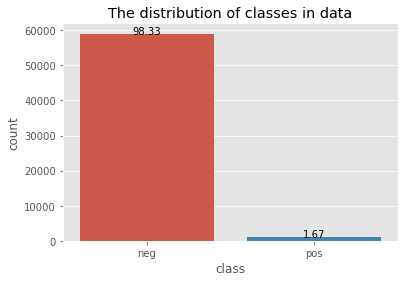

In [11]:
def class_distribution_plot(data):
    plt.title('The distribution of classes in data')
    plot_bar('class', data)
#     plt.show()
    
class_distribution_plot(df)

#### классы существенно несбалансированы, позитивных случаев в выборке всего 2%

# Baseline

In [12]:
def data_split_train_test(data, target_name, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=[target_name], axis=1),
    data[target_name],
    test_size=test_size,
    stratify=data[target_name],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [13]:
# пропусков в данных нет
df.shape, df.dropna().shape

((60000, 171), (60000, 171))

In [14]:
# декодирование целефой переменной
df['class']=df['class'].map({'neg': 1, 'pos': 0})

In [15]:
X_train, X_test, y_train, y_test = data_split_train_test(df,'class')

Train_shape: (42000, 170) Test shape: (18000, 170)


# Model

In [16]:
def scale_data(X_train, X_test, scaler_type="minmax"):
    if scaler_type=="minmax":
        scaler = MinMaxScaler()
    elif scaler_type=="std":
        scaler = StandardScaler()
    elif scaler_type=="robust":
        scaler = RobustScaler()
        
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test, "std")

In [17]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [18]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.991
Precision: 	 0.996
Recall: 	 0.994
f1_score: 	 0.995
ROC-AUC: 	 0.873



In [19]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873


## Корреляция в данных

In [20]:
def corr_feature_detect(data,target, threshold=0.8):
    
    corrmat = data.drop([target], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [21]:
data_num_corr_features = corr_feature_detect(df,'class', threshold=0.5)
print(data_num_corr_features)

['bv_000', 'bu_000', 'cf_000', 'ad_000', 'bt_000', 'bg_000', 'cc_000', 'bb_000', 'br_000', 'am_0', 'an_000', 'bp_000', 'cq_000', 'ah_000', 'bo_000', 'bh_000', 'ds_000', 'ba_003', 'ci_000', 'dn_000', 'cn_005', 'ee_003', 'aq_000', 'dc_000', 'ba_004', 'bq_000', 'dp_000', 'ap_000', 'ed_000', 'bn_000', 'ba_001', 'cs_005', 'cn_004', 'by_000', 'ee_000', 'ao_000', 'ba_000', 'ag_005', 'ba_005', 'cn_002', 'ag_003', 'bl_000', 'dm_000', 'cn_003', 'ee_002', 'ay_002', 'ba_006', 'cn_001', 'ag_006', 'az_005', 'bx_000', 'ck_000', 'ae_000', 'ba_002', 'ag_007', 'cu_000', 'dv_000', 'cv_000', 'bs_000', 'ee_001', 'aa_000', 'cn_007', 'ag_002', 'ay_009', 'az_001', 'ca_000', 'bm_000', 'ee_004', 'cn_000', 'dt_000', 'dx_000', 'ag_004', 'bi_000', 'cs_000', 'av_000', 'ee_008', 'cs_004', 'ee_005', 'cs_002', 'cs_003', 'ba_007', 'ba_009', 'cn_006', 'cs_007', 'dd_000', 'ee_006', 'ay_007', 'be_000', 'dz_000', 'ay_003', 'aj_000', 'az_004', 'ec_00', 'dr_000', 'do_000', 'ay_008', 'bd_000', 'bj_000', 'az_006', 'cn_008', 'a

In [22]:
len(df.columns)-1, len(data_num_corr_features)

(170, 101)

In [23]:
# итого 101 из 170 признаков сильно коррелируют с другими признаками, удалим их

In [24]:
df_corr_free = df.drop(data_num_corr_features, axis=1)

In [25]:
len(df_corr_free.columns)

70

## Missing values

In [26]:
prct_missing = (df.isna().sum() / df.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class     0.0
aa_000    0.0
ab_000    0.0
ac_000    0.0
ad_000    0.0
dtype: float64

Features with more then 40% NaNs: 0/171


In [27]:
# еще одна проверка на отсутствие пропущенных значений

In [28]:
df_corr_free.head(5)

,class,ab_000,ac_000,af_000,ag_000,ag_001,ag_008,ag_009,ai_000,ak_000,al_000,ar_000,as_000,at_000,ax_000,ay_000,ay_001,ay_004,ay_005,ay_006,az_000,az_002,az_003,az_007,az_008,az_009,ba_008,bc_000,bf_000,bk_000,bz_000,cb_000,cd_000,ce_000,cg_000,ch_000,cj_000,cl_000,cm_000,cn_009,co_000,cp_000,cr_000,cs_001,cs_006,cs_008,cs_009,ct_000,cx_000,cy_000,cz_000,da_000,db_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dq_000,du_000,dy_000,ea_000,eb_000,ee_007,ee_009,ef_000,eg_000
0,1,0.0,2.130706e+09,0.0,0.0,0.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,0.0,0.0,0.0,469014.0,4239660.0,5374.0,4114.0,12348.0,4.0,0.0,0.0,0.0,0.0,50.0,330760.0,68656.0,638360.0,1209600.0,246244.0,96.0,0.0,0.0,6.0,1924.0,1608.0,220.0,240.0,0.0,1226.0,895240.0,118.0,0.0,532.0,51288.0,0.0,532572.0,0.0,18.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14745580.0,0.0,0.0,2801180.0,157956.0,0.0,0.0,0.0
1,1,0.0,0.000000e+00,0.0,0.0,0.0,31642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,7336.0,13776.0,13086.0,6.0,0.0,0.0,87082.0,86.0,350.0,341420.0,260120.0,6900.0,1209600.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,796.0,301242.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4510080.0,0.0,0.0,3477820.0,81140.0,1500.0,0.0,0.0
2,1,0.0,2.280000e+02,0.0,0.0,0.0,12016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,870456.0,1620.0,1228.0,34250.0,0.0,0.0,0.0,46.0,128.0,4.0,137160.0,7466.0,248240.0,1209600.0,63328.0,124.0,0.0,0.0,0.0,0.0,28.0,0.0,6.0,0.0,500.0,488302.0,246.0,0.0,230.0,29188.0,22.0,20346.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300240.0,0.0,0.0,1040120.0,158022.0,514.0,0.0,0.0
3,1,0.0,7.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,64.0,6.0,914.0,1692.0,0.0,0.0,0.0,2.0,0.0,0.0,50.0,21400.0,1209600.0,302.0,6.0,0.0,0.0,2.0,16.0,0.0,2.0,2.0,0.0,6.0,388.0,0.0,0.0,138.0,72.0,0.0,12.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,15740.0,44.0,0.0,0.0,0.0,0.0,4.0,32.0
4,1,0.0,1.368000e+03,0.0,0.0,0.0,4588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0,42124.0,372236.0,2128914.0,1644.0,562.0,842.0,0.0,0.0,0.0,19292.0,448.0,2.0,306780.0,17052.0,654700.0,1209600.0,135720.0,152.0,0.0,0.0,0.0,746.0,86.0,202.0,212.0,0.0,520.0,1137268.0,204.0,0.0,1716.0,215826.0,0.0,4262.0,0.0,0.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457040.0,27588.0,0.0,21173050.0,311560.0,1218.0,0.0,0.0


In [29]:
X_train, X_test, y_train, y_test = data_split_train_test(df_corr_free,'class')
X_train_scaled, X_test_scaled = scale_data(X_train, X_test, "std")

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_free_corr = quality_report(pred, y_test.values)

Train_shape: (42000, 69) Test shape: (18000, 69)

=== Quality Report ===
Accuracy: 	 0.987
Precision: 	 0.997
Recall: 	 0.991
f1_score: 	 0.994
ROC-AUC: 	 0.841



In [30]:
df_quality.loc["free corr", :] = quality_list_free_corr

df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841


In [31]:
df['class'].value_counts()

1    59000
0     1000
Name: class, dtype: int64

In [32]:
def get_balanced_sample(data,target, n=1000):
    data_0 = data[data[target]==0].sample(n=n)
    data_1 = data[data[target]==1].sample(n=n)
    return pd.concat([data_0, data_1])

df_sample_balanced = get_balanced_sample(df_corr_free,'class')

In [33]:
X_train, X_test, y_train, y_test = data_split_train_test(df_sample_balanced,'class')
X_train_scaled, X_test_scaled = scale_data(X_train, X_test, "std")

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_free_corr = quality_report(pred, y_test.values)

Train_shape: (1400, 69) Test shape: (600, 69)

=== Quality Report ===
Accuracy: 	 0.923
Precision: 	 0.953
Recall: 	 0.899
f1_score: 	 0.926
ROC-AUC: 	 0.925



In [34]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.1,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

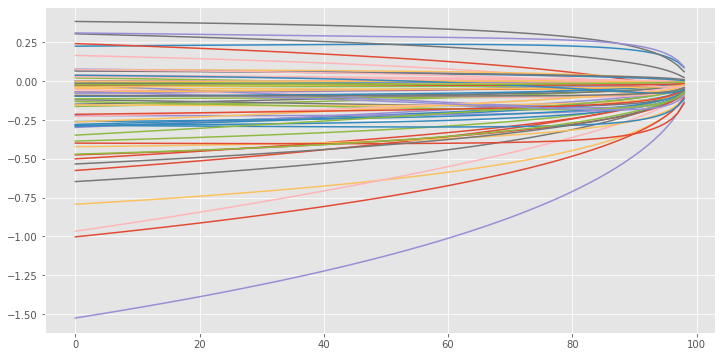

In [35]:
coefs_df_l2 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l2")
plot_reg_coefs(coefs_df_l2)

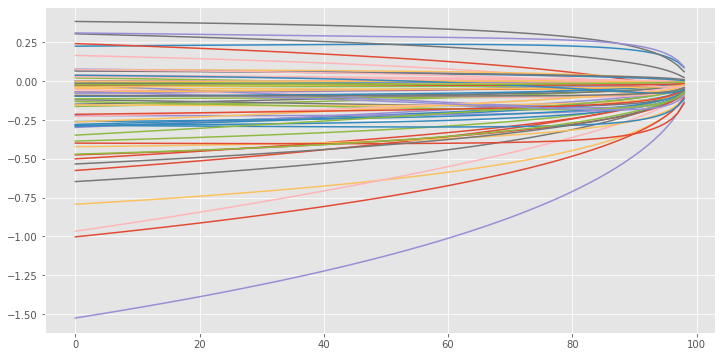

In [36]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")
plot_reg_coefs(coefs_df_l2)

In [37]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [38]:
## c помощью l1 регуризации получим 5 и 10 наиболее важных признаков модели

In [39]:
reg_important_5_features = get_important_features(coefs_df_l1, n_feats_limit=50)

reg_important_10_features = get_important_features(coefs_df_l1, n_feats_limit=75)

# reg_important_5_features, reg_important_10_features

In [40]:
def assess_data(data, df_quality, exp_name, verbose=False):
    X_train, X_test, y_train, y_test = data_split_train_test(data, "class")
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test, "std")

    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [41]:
df_quality = assess_data(df_corr_free[["class"]+reg_important_5_features],
                         df_quality, exp_name="regularization_15", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841
regularization_15,0.986,0.997,0.989,0.993,0.815


In [42]:
df_quality = assess_data(df_corr_free[["class"]+reg_important_10_features],
                         df_quality, exp_name="regularization_75", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841
regularization_15,0.986,0.997,0.989,0.993,0.815
regularization_75,0.986,0.997,0.989,0.993,0.815


# Выбросы в данных

In [43]:
data_reg_5 = df_corr_free[["class"]+reg_important_5_features.copy()]

data_reg_10 = df_corr_free[["class"]+reg_important_10_features.copy()]

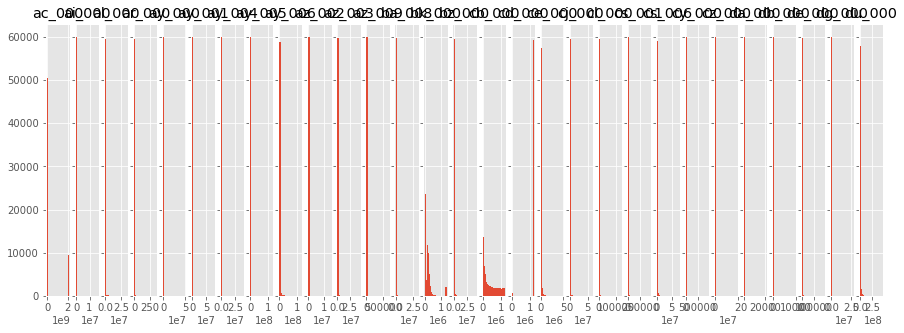

In [44]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10[f], bins=20)
plt.show()

In [45]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

In [46]:
data_reg_5_STD_outliers = windsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="std", strategy='both')

data_reg_5_IQR_outliers = windsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="iqr", strategy='both')

data_reg_10_STD_outliers = windsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="std", strategy='both')

data_reg_10_IQR_outliers = windsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="iqr", strategy='both')

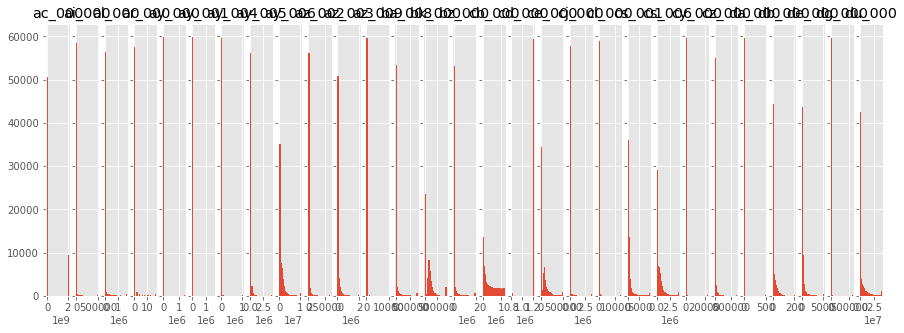

In [47]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10_STD_outliers[f], bins=20)
plt.show()

In [48]:
df_quality = assess_data(data_reg_5_STD_outliers,
                         df_quality, exp_name="reg_50_outliers_std", verbose=False)

df_quality = assess_data(data_reg_5_IQR_outliers,
                         df_quality, exp_name="reg_50_outliers_iqr", verbose=False)

df_quality = assess_data(data_reg_10_STD_outliers,
                         df_quality, exp_name="reg_70_outliers_std", verbose=False)

df_quality = assess_data(data_reg_10_IQR_outliers,
                         df_quality, exp_name="reg_70_outliers_iqr", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)
Train_shape: (42000, 29) Test shape: (18000, 29)
Train_shape: (42000, 29) Test shape: (18000, 29)
Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841
regularization_15,0.986,0.997,0.989,0.993,0.815
regularization_75,0.986,0.997,0.989,0.993,0.815
reg_50_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_50_outliers_iqr,0.985,0.996,0.989,0.993,0.791
reg_70_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_70_outliers_iqr,0.985,0.996,0.989,0.993,0.791


In [49]:
def get_lof_outliers(data_df, verbose=True):
    model_LOF = LocalOutlierFactor(n_neighbors=500)
    outlier_indicator = model_LOF.fit_predict(data_df)
    if verbose:
        print("Number of outliers: {} / {}".format(
            len(outlier_indicator[outlier_indicator==-1]),
            len(outlier_indicator)
        ))
    outlier_indicator = pd.Series(outlier_indicator, name="LOF_outlier").replace({1:0, -1:1})
    return outlier_indicator

In [50]:
X_train, X_test, y_train, y_test = data_split_train_test(data_reg_10, "class")
X_train_scaled, X_test_scaled = scale_data(X_train, X_test, "std")

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Train_shape: (42000, 29) Test shape: (18000, 29)


In [51]:
X_train_scaled["LOF_outlier"] = get_lof_outliers(X_train_scaled)

X_test_scaled["LOF_outlier"] = get_lof_outliers(X_test_scaled)

Number of outliers: 9588 / 42000
Number of outliers: 4511 / 18000


In [52]:
def asses_data_wo_splitting(X_train_scaled, X_test_scaled,
                            y_train, y_test,
                            df_quality, exp_name, verbose=False):
    
    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [53]:
df_quality = asses_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="reg_50_lof", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841
regularization_15,0.986,0.997,0.989,0.993,0.815
regularization_75,0.986,0.997,0.989,0.993,0.815
reg_50_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_50_outliers_iqr,0.985,0.996,0.989,0.993,0.791
reg_70_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_70_outliers_iqr,0.985,0.996,0.989,0.993,0.791
reg_50_lof,0.986,0.998,0.989,0.993,0.839


# балансировка классов

In [54]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

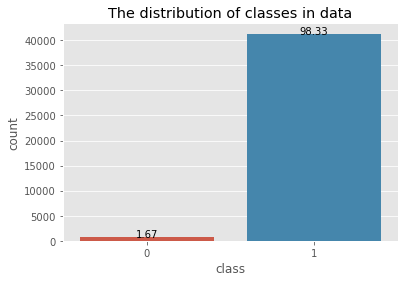

In [56]:
class_distribution_plot(pd.DataFrame(y_train))

In [57]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

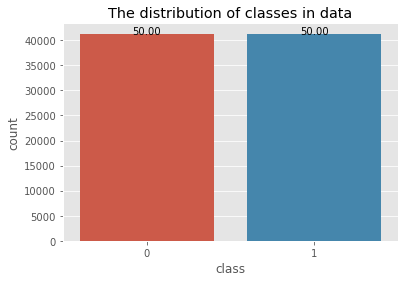

In [58]:
class_distribution_plot(pd.DataFrame(y_train_sampled))

In [59]:
df_quality = asses_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="reg_50_lof_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.991,0.996,0.994,0.995,0.873
free corr,0.987,0.997,0.991,0.994,0.841
regularization_15,0.986,0.997,0.989,0.993,0.815
regularization_75,0.986,0.997,0.989,0.993,0.815
reg_50_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_50_outliers_iqr,0.985,0.996,0.989,0.993,0.791
reg_70_outliers_std,0.987,0.996,0.991,0.993,0.823
reg_70_outliers_iqr,0.985,0.996,0.989,0.993,0.791
reg_50_lof,0.986,0.998,0.989,0.993,0.839
reg_50_lof_smote,0.947,0.947,0.998,0.972,0.613


# Эконометрический подход

In [60]:
import statsmodels.api as sm

In [64]:
model = sm.Logit(y_train.values, X_train_scaled)
result = model.fit()
result.summary()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix